# Linear Regression

This notebook covers a Python-based solution for linear regression and follows the course slides. It is intended to give a quick introduction to Python and Jupyter using an example of linear regression. (The notebooks is adapted from one created by J. D. Wittenauer and shared through github.com.) 

## Linear regression with one variable

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

Let's start by importing some libraries and examining the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.getcwd() + '/../../data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Let's plot it to get a better idea of what the data looks like.

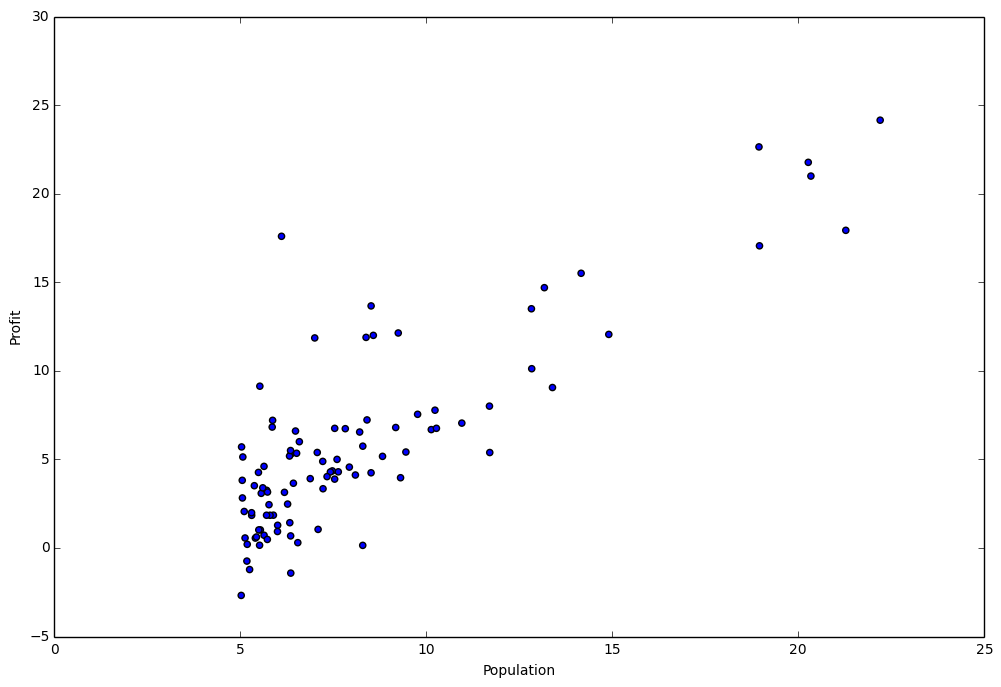

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Now let's implement linear regression using gradient descent to minimize the cost function.  The equations implemented in the following code samples are detailed in "ex1.pdf" in the "exercises" folder.

First we'll create a function to compute the cost of a given solution (characterized by the parameters theta).

In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [6]:
data.insert(0, 'Ones', 1)

Now let's do some variable initialization.

In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Let's take a look to make sure X (training set) and y (target variable) look correct.

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  We also need to initialize theta.

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

Here's what theta looks like.

In [11]:
theta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.

In [12]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for theta).

In [13]:
computeCost(X, y, theta)

32.072733877455654

So far so good.  Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

In [14]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [15]:
alpha = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [16]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [17]:
computeCost(X, y, g)

4.5159555030789136

Now let's plot the linear model along with the data to visually see how well it fits.

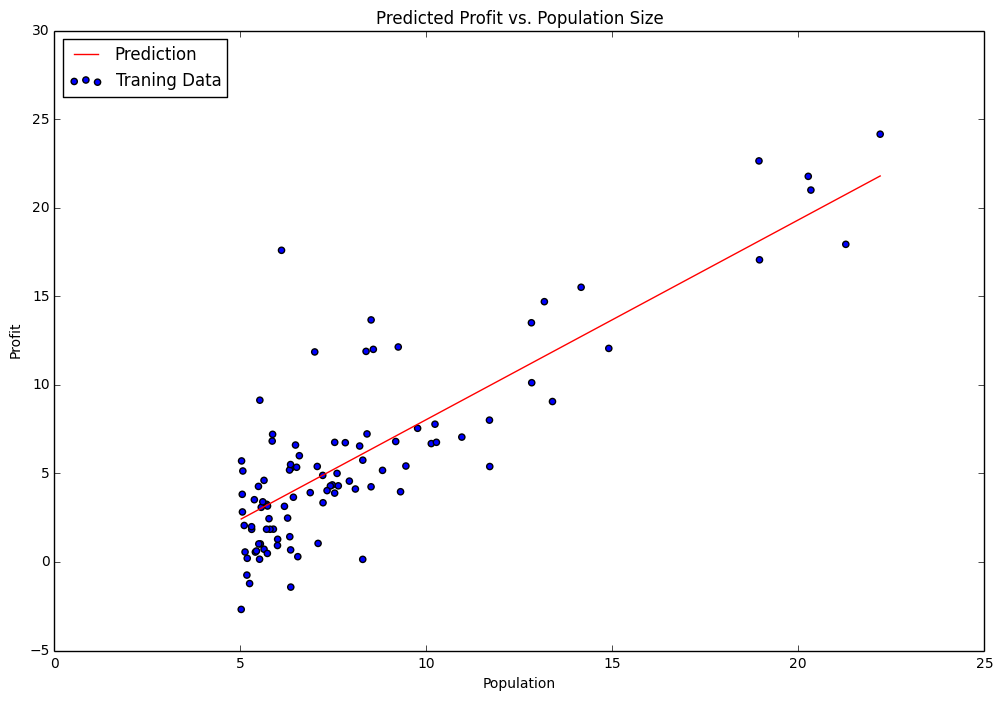

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

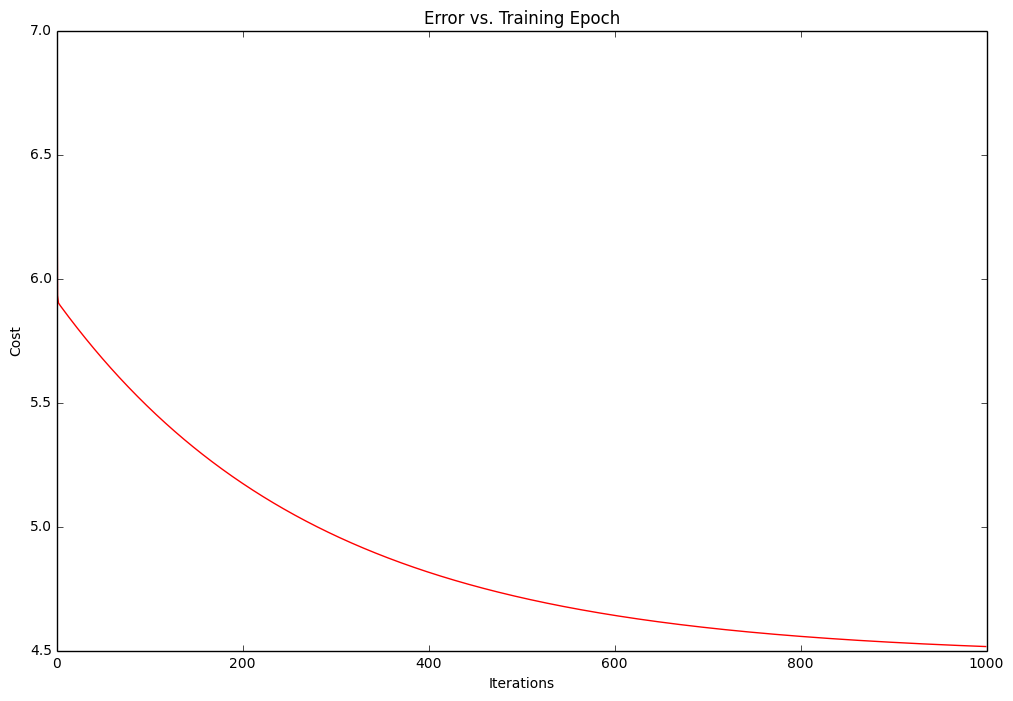

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Linear regression with multiple variables

Exercise 1 also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house).  Let's use the techniques we already applied to analyze that data set as well.

In [25]:
path = os.getcwd() + '/../../data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


For this task we add another pre-processing step - normalizing the features.  This is very easy with pandas.

In [26]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [27]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
print g2

# get the cost (error) of the model
computeCost(X2, y2, g2)

[[ -1.10992775e-16   8.78503652e-01  -4.69166570e-02]]


0.13070336960771892

Now let's plot the linear model along with the data to visually see how well it fits.

In [36]:
#UNABLE TO LOAD THIS TOOLKIT SO CANNOT PLOT IN 3D
#from mpl_toolkits.mplot3d import Axes3D

#xx1 = np.linspace(data2.Size.min(), data2.Size.max(), 100)
#xx2 = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)
#f = g2[0, 0] + (g2[0, 1] * xx1) + (g2[0, 2] * xx2)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot(xx1, xx2, f, 'r', label='Prediction')
#ax.scatter(data2.Size, data2.Bedrooms, data2.Price, label='Traning Data')
#ax.legend(loc=2)
#ax.set_xlabel('Size')
#ax.set_ylabel('Bedrooms')
#ax.set_zlabel('Price')
#ax.set_title('Price vs Size and Number of Bedrooms')

We can take a quick look at the training progess for this one as well.

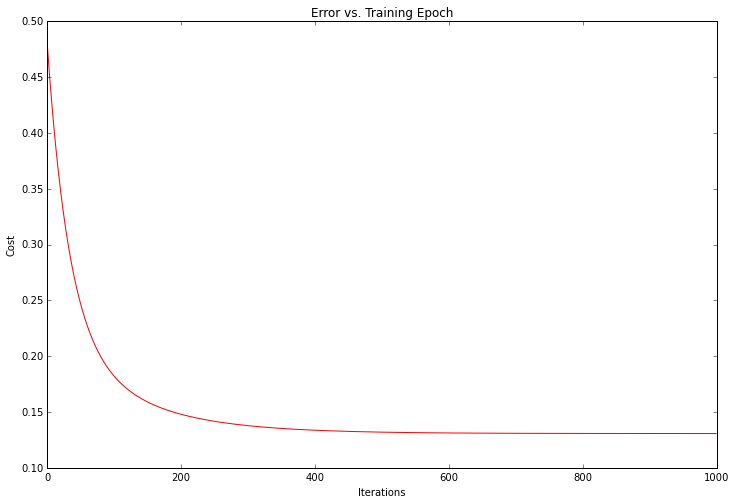

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.

In [24]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

Here's what the scikit-learn model's predictions look like.

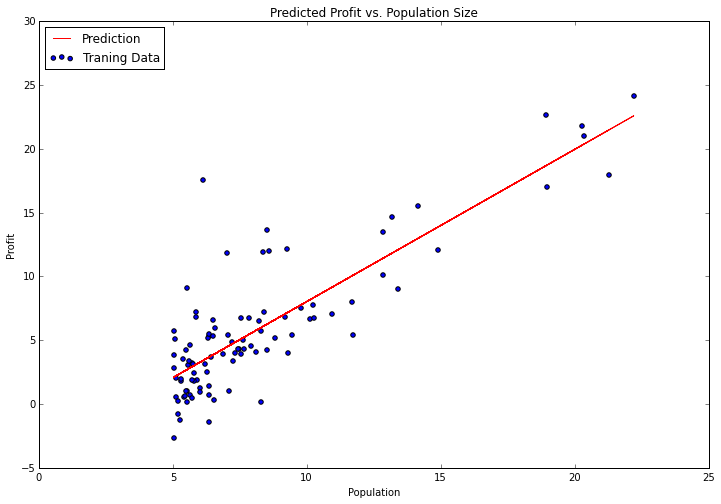

In [25]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

That's it!  Thanks for reading.  In Exercise 2 we'll take a look at logistic regression for classification problems.